In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.model_selection import cross_val_predict


In our case we have to determine the number based on its image. There are 10 possible outcomes of this i.e. 
0,1,2,3,. . .,9

In multiclass classification there are two types of classification techniques
1. One Vs One Classification
In OvO technique, binary classifiers for every possible pair of classes are created and compared.
The class winning majority of these matches is considered the output label.
In our case we will have total of 45 classifiers.
Advantage of this type of technique is that every classifier only needs to be trained on the part of training set for two classifiers it must distinguish


2. One Vs. Rest Classification
In this technique, we create classifier for every class and the one with highesh score is selected.
In our case , we will have 10 binary classifiers (from 0-detector to 9-detector).


In [2]:
mnist=fetch_openml('mnist_784',version=1)

In [3]:
X,y=mnist['data'],mnist['target']
y=y.astype(np.uint8)

In [4]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [5]:
some_digit=X.iloc[5]

In [6]:
some_digit_image=some_digit.to_numpy().reshape(28,28)

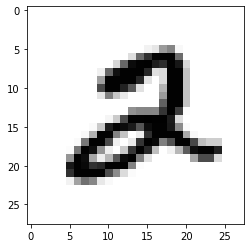

In [7]:
plt.imshow(some_digit_image,cmap='binary')

In [8]:
svm_clf_ovr=OneVsRestClassifier(SVC())

In [9]:
svm_clf_ovr.fit(X_train,y_train)

OneVsRestClassifier(estimator=SVC())

In [10]:
svm_clf_ovr.predict([some_digit])

/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have va

array([2], dtype=uint8)

In [11]:
svm_clf_ovr.decision_function([some_digit])

/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have va

array([[-2.03446217, -2.81207233,  1.69822406, -1.13916881, -2.58783509,
        -2.41481011, -2.42337939, -2.5950999 , -1.38478999, -1.30581245]])

In [12]:
len(svm_clf_ovr.estimators_)

10

This is basically a OvR technique

In [13]:
svm_clf_ovo=OneVsOneClassifier(SVC())

In [14]:
svm_clf_ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=SVC())

In [15]:
svm_clf_ovo.predict([some_digit])

/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

In [16]:
svm_clf_ovo.decision_function([some_digit])

/home/harshkulkarni/venv/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([[ 2.74462692, -0.29919237,  9.3141368 ,  7.26822372,  3.75741665,
         3.74458518,  0.7110088 ,  2.76267522,  8.27641978,  6.2070111 ]])

In [18]:
len(svm_clf_ovo.estimators_)

45

This is One Vs One Classifier

In [ ]:
y_train_pred_ovr=svm_clf_ovr.predict(X_train)

In [ ]:
y_train_pred_ovo=svm